In [1]:
#import packages
import pandas as pd
import numpy as np

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

#read the file
df = pd.read_csv('./Dataset/BanksDataset/AXISBANK.csv')

#print the head
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [2]:
df= df.drop(['Deliverable Volume', '%Deliverble'], axis=1)

In [3]:
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5092,2020-06-24,AXISBANK,EQ,443.65,448.0,448.50,422.20,425.4,424.65,435.17,33577340,1.461173e+15,304342.0
5093,2020-06-25,AXISBANK,EQ,424.65,419.0,428.70,410.35,418.9,421.70,420.13,49854504,2.094542e+15,356209.0
5094,2020-06-26,AXISBANK,EQ,421.70,426.0,428.75,418.00,426.0,424.85,422.80,32611425,1.378815e+15,233244.0
5095,2020-06-29,AXISBANK,EQ,424.85,415.0,415.80,402.35,404.9,404.80,406.79,36320111,1.477448e+15,333423.0


In [4]:
df1 = df.reset_index()['Close']

In [5]:
df1.shape

(5097,)

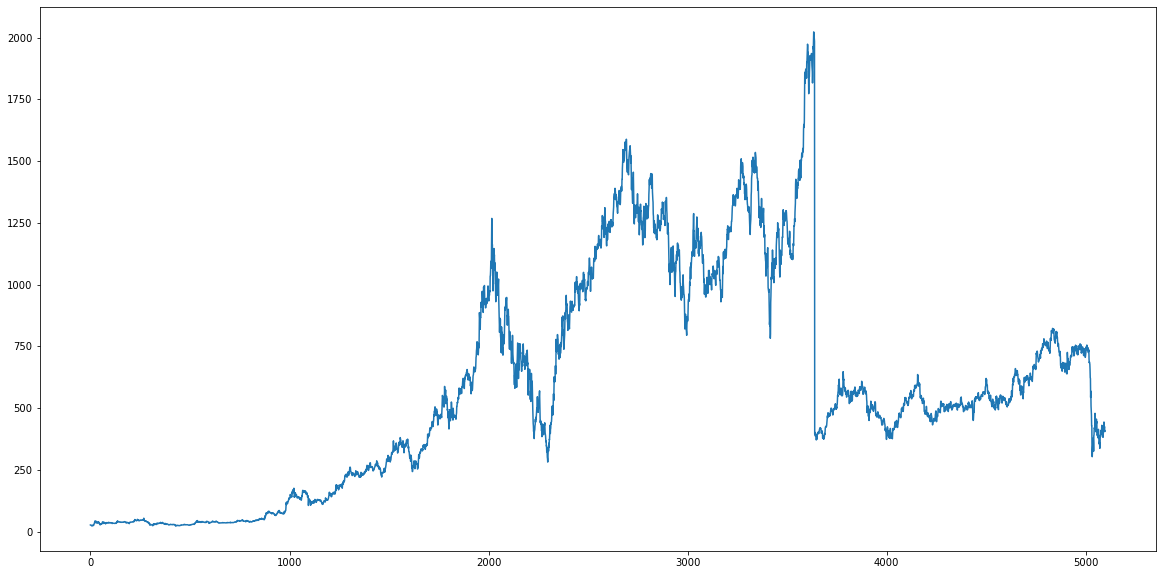

In [6]:
# Plotting the dataframe
plt.plot(df1)

In [7]:
df1= scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [8]:
df1

array([[0.00227364],
       [0.00234859],
       [0.00207376],
       ...,
       [0.20122926],
       [0.19121027],
       [0.19213472]])

In [9]:
df1.shape

(5097, 1)

In [10]:
# SPLITTING INTO TRAIN AND TEST
#deciding the split size
trainSize = int(len(df1)*0.65)
testSize= int(len(df1))- trainSize

#Making the splits
trainData, testData = df1[0:trainSize, :],df1[0:testSize, :] 

In [11]:
len(trainData), len(testData)


(3313, 1784)

In [12]:
# Converting the array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY= [],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step= 320
X_train, Y_train= create_dataset(trainData, time_step)
X_test, Y_test= create_dataset(testData, time_step)

In [14]:
print(X_train.shape)

(2992, 320)


In [15]:
print(Y_train.shape)

(2992,)


In [16]:
#Before going into LSTM, we have to make our data 3D
X_train= X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test= X_test.reshape(X_test.shape[0], X_test.shape[1],1)


In [17]:
#Creating the stacked LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Dense
from tensorflow.keras.models import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(70, return_sequences= True, input_shape=(320,1)))
model.add(LSTM(70, return_sequences= True))
model.add(LSTM(70))
model.add(Dense(1))
model.compile(loss= 'mean_squared_error')